### 네이버 영화 평점 데이터
- 영화명, 평점
- 네이버 영화> 영화랭킹 >평점순 (현재상영영화)

In [2]:
# 환경셋팅
import requests as req
from bs4 import BeautifulSoup as bs
import pandas as pd
header = {"user-agent":'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.5304.122 Safari/537.36'}

In [5]:
url = 'https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&date=20221214'
#html 요청
res = req.get(url,  headers = header)
#파이썬객체변화
html =bs(res.text, 'lxml')# 형식
html

<!DOCTYPE html>
<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="me2:image"/>
<meta content="네이버영화 " property="me2:post_tag"/>
<meta content="네이버영화" property="me2:category1"/>
<meta content="" property="me2:category2"/>
<meta content="랭킹 : 네이버 영화" property="og:title"/>
<meta content="영화, 영화인, 예매, 박스오피스 랭킹 정보 제공" property="og:description"/>
<meta content="article" property="og:type"/>
<meta content="https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&amp;date=20221214" property="og:url"/>
<meta content="http://static.naver.net/m/movie/icons/OG_270_270.png" property="og:image"/><!-- http://static.naver.net/m/movie/im/navermovie.jpg -->
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="og:article:thumbnailUrl"/>
<meta content="네이버 영화" property="og:article:author"/

In [25]:
#영화명, 평점 데이터 수집 후 출력해보기
#길이 확인하기
movie_name = html.select('.tit5>a')
movie_point = html.select('.point')
name_txt = []
point_txt = []
lank_lst = []

for i in range(len(movie_name)):
    lank_lst.append(i+1)
    name_txt.append(movie_name[i].text)
    point_txt.append(movie_point[i].text)
    
print(len(lank_lst),len(name_txt),len(lank_lst))

50 50 50


In [17]:
# 텍스트만 저장!

# list comprehension 문법- 리스트 내포
# list 의 각 요소를 반복 하기 위해 for 루프와 함께 실행되는 표현식
# [표현갑 for i in 반복대상]
# 1. 루프보다 시간 효율적 , 공간 효율적
# 2. 더 작은  수의 코드로 짤 수 있음 (가독성)
movie_n_lst2 = [i.text for i in movie_name]
movie_n_lst2 = [i.text for i in movie_point]
movie_n_lst2

['9.37',
 '9.30',
 '9.28',
 '9.24',
 '9.23',
 '9.23',
 '9.22',
 '9.18',
 '9.16',
 '9.13',
 '9.13',
 '9.09',
 '9.04',
 '9.03',
 '9.00',
 '8.95',
 '8.95',
 '8.92',
 '8.81',
 '8.77',
 '8.76',
 '8.75',
 '8.72',
 '8.68',
 '8.66',
 '8.62',
 '8.61',
 '8.46',
 '8.44',
 '8.42',
 '8.38',
 '8.36',
 '8.36',
 '8.35',
 '8.31',
 '8.25',
 '8.14',
 '8.12',
 '8.12',
 '7.97',
 '7.93',
 '7.89',
 '7.83',
 '7.72',
 '7.68',
 '7.58',
 '6.88',
 '6.79',
 '6.75',
 '6.40']

In [66]:
# 데이터 프레임으로 구성
movie_dic ={"순위":lank_lst,"영화제목":name_txt,"평점":point_txt}
# 딕셔너리 정의
movie_dic
#2. df 함수 연걸
movie_df = pd.DataFrame(movie_dic)
movie_df.head()
#2. pd.DataFrame()


,순위,영화제목,평점
0,1,탑건: 매버릭,9.76
1,2,올빼미,9.38
2,3,극장판 짱구는 못말려: 수수께끼! 꽃피는 천하떡잎학교,9.31
3,4,바람과 함께 사라지다,9.25
4,5,극장판 주술회전 0,9.23


### 페이지를 이동하면서 날짜별 영화명,평점 데이터 수집하기
- 20221210 - 20221214(5일)페이지 접근
- 각 페이지마다 영화명, 평점데이터 수집
- 각 페이지에 접근하기 위해서 url을 활용 :날짜 값을 변경

In [67]:
#url = 'https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&date=20221214'
# day_lst =['20221210',20221210]

day_lst = pd.date_range(start="2022-12-10",periods =5)
day_lst[0].strftime("%Y%m%d")# 문자열 포매팅 % ,format(),f-문자열


'20221210'

In [33]:
day_lst2 = [i.strftime("%Y%m%d") for i in day_lst]
day_lst2


['20221210', '20221211', '20221212', '20221213', '20221214']

In [69]:
#20221210~20221214(5일)페이지 접근하는 코드
name_txt = []
point_txt = []
lank_lst = []
movie_day= []

for day in day_lst2:
    url = 'https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur'
    #html 요청
    res = req.get(url,  headers = header, params = {'date':day})
    #파이썬객체변화
    html =bs(res.text, 'lxml')# 형식
    html
    
    #영화명, 평점 데이터 수집
    
    movie_name = html.select('.tit5>a')
    movie_point = html.select('.point')
    print(day,len(lank_lst),len(name_txt),len(lank_lst))

    
    for i in range(len(movie_name)):
        lank_lst.append(i+1)
        movie_day.append(day)
        name_txt.append(movie_name[i].text)
        point_txt.append(movie_point[i].text)
movie_dic ={"날짜":movie_day,"순위":lank_lst,"영화제목":name_txt,"평점":point_txt}
movie_df = pd.DataFrame(movie_dic)
# 날짜 2022년 1월 12일 날짜에 대한 대한 영화 정보 출력해보기
# 불리언 인덱싱
# movie_df[movie_df['날짜'] =='20221212']['영화제목']
movie_df.loc[movie_df['날짜'] =='20221212','영화제목']


20221210 0 0 0
20221211 50 50 50
20221212 100 100 100
20221213 150 150 150
20221214 200 200 200


100                          탑건: 매버릭
101                              올빼미
102    극장판 짱구는 못말려: 수수께끼! 꽃피는 천하떡잎학교
103                       공동경비구역 JSA
104                      바람과 함께 사라지다
105                       극장판 주술회전 0
106                               벤허
107                         인생은 아름다워
108                           어바웃 타임
109                               귀향
110                             러브레터
111                               코다
112                          오즈의 마법사
113                               탄생
114                           비긴 어게인
115                      타오르는 여인의 초상
116                             보디가드
117                             윤희에게
118                                시
119                          러브 액츄얼리
120                     매드맥스: 분노의 도로
121                          너의 이름은.
122                       찬실이는 복도 많지
123                        한산: 용의 출현
124         오늘 밤, 세계에서 이 사랑이 사라진다 해도
125                               벌새
126                           헤어질 결심
1

In [72]:
        # 데이터 프레임으로 구성
        movie_dic ={"순위":lank_lst,"영화제목":name_txt,"평점":point_txt}
        # 딕셔너리 정의
        movie_dic
        #2. df 함수 연걸
        movie_df = pd.DataFrame(movie_dic)
        movie_df.head()
        #2. pd.DataFrame()

,순위,영화제목,평점
0,1,탑건: 매버릭,9.76
1,2,올빼미,9.38
2,3,극장판 짱구는 못말려: 수수께끼! 꽃피는 천하떡잎학교,9.31
3,4,바람과 함께 사라지다,9.25
4,5,극장판 주술회전 0,9.23


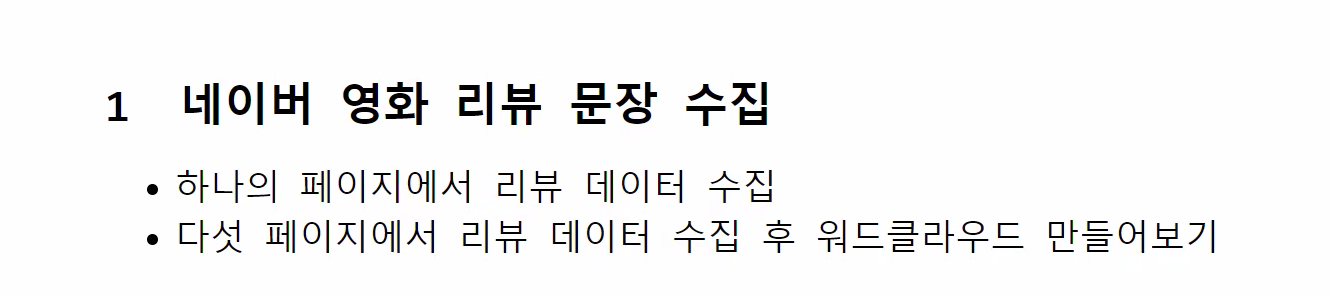